In [3]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv(r"C:\Users\49152\Documents\CPS\MachineLearning\Untitled Folder 1\spam_data.csv") 
data.head()

,message,label
0,Get a free iPhone now!,spam
1,Congratulations! You've won a trip to Hawaii!,spam
2,"Hey, are you free for dinner tonight?",ham
3,Reminder: Your appointment is tomorrow at 2 PM.,ham
4,URGENT: Your account has been compromised. Tak...,spam


['spam' 'ham']
Accuracy: 1.0


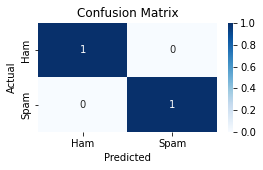

In [16]:
# Preprocess the data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['message'])
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train.toarray(), y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test.toarray())
print(y_pred)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Ham', 'Spam']
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:

# Example test messages
test_messages = ["Hello, how are you?",
                 "Earn money fast!",
                 "Congratulations, you've won a prize!",
                 "Don't forget to attend the meeting tomorrow."]

# Convert the preprocessed test messages into feature vectors
test_vectors = vectorizer.transform(test_messages).toarray()
predicted_labels = model.predict(test_vectors)

print("Predicted Labels:", predicted_labels)


Predicted Labels: ['ham' 'spam' 'spam' 'ham']
